# Setup

### Setup dataset

In [100]:
from keras.datasets import mnist
from keras.utils import np_utils
(trainX, trainy), (testX, testy) = mnist.load_data()
trainX, testX = [x.reshape(x.shape[0], x.shape[1] * x.shape[2]) for x in [trainX, testX]]
trainY, testY = [np_utils.to_categorical(y, 10) for y in [trainy, testy]]

# Scale input
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

### Prepare helper function

In [101]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

def gen_model(weight_path=None):
    model = Sequential()
    model.add(Dense(100, input_shape=(784,)))
    model.add(Activation("relu"))
    model.add(Dense(10))
    model.add(Activation("softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
    if weight_path:
        model.load_weights(weight_path)
    return model

In [102]:
from sklearn.metrics import classification_report

def evaluate_model(model, testX, testY):
    Yhat = model.predict(testX)
    yhat = np.argmax(Yhat, axis=1)
    print(classification_report(testy, yhat))

### Generate model

In [103]:
# Start training
model = gen_model()
nb_epoch = 12
history = model.fit(trainX, trainY, batch_size=128, nb_epoch=nb_epoch, verbose=0, validation_split=0.1)
evaluate_model(model, testX, testY)

             precision    recall  f1-score   support

          0       0.94      0.98      0.96       980
          1       0.97      0.98      0.97      1135
          2       0.93      0.90      0.92      1032
          3       0.90      0.91      0.91      1010
          4       0.90      0.94      0.92       982
          5       0.91      0.87      0.89       892
          6       0.94      0.94      0.94       958
          7       0.93      0.92      0.92      1028
          8       0.90      0.89      0.90       974
          9       0.91      0.89      0.90      1009

avg / total       0.92      0.92      0.92     10000



# Visualize how input effects the activation

### Fetch layers from model

In [112]:
layer1 = model.layers[0]
activation1 = model.layers[1]
layer2 = model.layers[2]
activation2 = model.layers[3]

### Prepare visualize function

In [140]:
def record_activation(input_dim, activate_lambda):
    record = [None for i in range(input_dim)]
    for i in range(input_dim):
        X = np.zeros(input_dim)
        X[i] = 1
        record[i] = activate_lambda(X)
    return record
        
def visualize_activation(record, w, h):
    recordT = np.array(record).T
    for i in range(w*h):
        plt.subplot(w, h, i+1)
        plt.imshow(recordT[i].reshape(28,28), cmap="gray")
    plt.show()

### Visualize activation of first layer

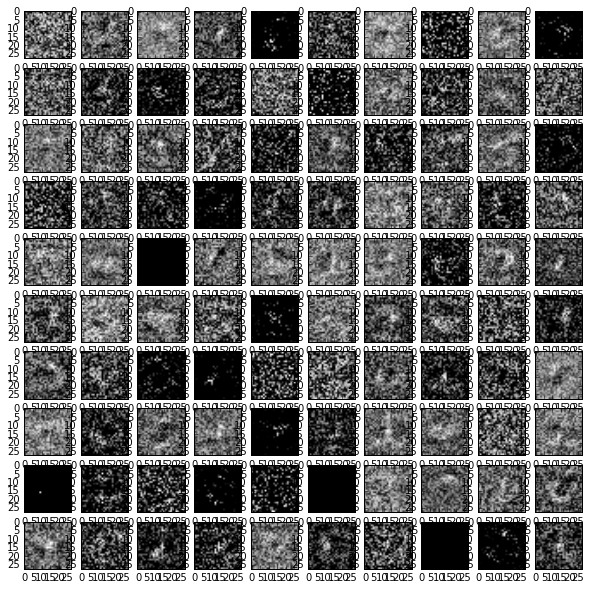

In [143]:
plt.figure(figsize=(10, 10))
first_activation_record = record_activation(784, lambda x: activation1.call(layer1.call(x)).eval())
visualize_activation(first_activation_record, 10, 10)

### Visualize activation of output layer

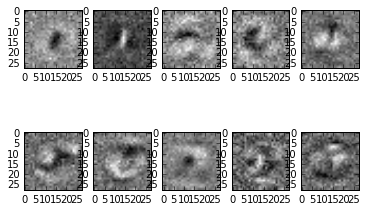

In [144]:
import theano.tensor as T

out_activation_record = record_activation(784, lambda x: T.nnet.softmax(layer2.call(activation1.call(layer1.call(x)))).eval())
visualize_activation(out_activation_record, 2, 5)